# UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1l7bHyrjzq839zVZE06cfdDksLabCN2hg"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Future Sales Time-series Prediction 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1vi45x-LGEzwvJoQstierOC1QZ11QQUmS)

![alt text](https://drive.google.com/uc?id=1eLLebiXwkN6x1dpsopQmkVNkR9zAYL7H)

![alt text](https://drive.google.com/uc?id=1a_q_DC8NyGBmcrxE0sGV4r6Hl-0w6G0K)

![alt text](https://drive.google.com/uc?id=1hNE0Wwc_bCCIO-AUAi6Xqo_9Bf1Xbh2o)

![alt text](https://drive.google.com/uc?id=1lQVgHsXn4Ur61dgYul1G-CmseLLUCEOB)

# DATA SOURCE

https://www.kaggle.com/c/rossmann-store-sales/data

# IMPORT LIBRARIES AND DATASET 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [ ]:
#removes scientific notation for summary tables
pd.set_option('display.float_format', lambda x: '%.5f' % x)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORT SALES TRAINING DATA

In [ ]:
# You have to include the full link to the csv file containing your dataset
sales_train_df = pd.read_csv('/content/drive/My Drive/Projects/sales department/train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
sales_train_df.head(5)
# almost a million observation 
# 1115 unique stores 
# Note that sales is the target variable (that's what we are trying to predict) 

# Id: transaction ID (combination of Store and date) 
# Store: unique store Id
# Sales: sales/day, this is the target variable 
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_train_df.tail(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
sales_train_df.info()
# 9 columns in total 
# 8 features, each contains 1017209 data points
# 1 target variable (sales)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
sales_train_df.describe()
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551 
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00000,1017209.00000,1017209.00000,1017209.00000,1017209.00000,1017209.00000,1017209.00000
mean,558.42973,3.99834,5773.81897,633.14595,0.83011,0.38151,0.17865
std,321.90865,1.99739,3849.92618,464.41173,0.37554,0.48576,0.38306
min,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,280.00000,2.00000,3727.00000,405.00000,1.00000,0.00000,0.00000
50%,558.00000,4.00000,5744.00000,609.00000,1.00000,0.00000,0.00000
75%,838.00000,6.00000,7856.00000,837.00000,1.00000,1.00000,0.00000
max,1115.00000,7.00000,41551.00000,7388.00000,1.00000,1.00000,1.00000


IMPORT STORE INFORMATION DATA

In [ ]:
store_info_df = pd.read_csv('/content/drive/My Drive/Projects/sales department/store.csv')
# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store




In [ ]:
store_info_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00000,9.00000,2008.00000,0,nan,nan,NaN
1,2,a,a,570.00000,11.00000,2007.00000,1,13.00000,2010.00000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00000,12.00000,2006.00000,1,14.00000,2011.00000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00000,9.00000,2009.00000,0,nan,nan,NaN
4,5,a,a,29910.00000,4.00000,2015.00000,0,nan,nan,NaN


In [ ]:
# Let's do the same for the store_info_df data
# Note that the previous dataframe includes the transactions recorded per day (in millions)
# This dataframe only includes information about the unique 1115 stores that are part of this study 
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# on average, the competition distance is 5404 meters away (5.4 kms)
store_info_df['CompetitionDistance'].mean()

5404.901079136691

In [ ]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.00000,761.00000,761.00000,1115.00000,571.00000,571.00000
mean,558.00000,5404.90108,7.22470,2008.66886,0.51211,23.59545,2011.76357
std,322.01708,7663.17472,3.21235,6.19598,0.50008,14.14198,1.67494
min,1.00000,20.00000,1.00000,1900.00000,0.00000,1.00000,2009.00000
25%,279.50000,717.50000,4.00000,2006.00000,0.00000,13.00000,2011.00000
50%,558.00000,2325.00000,8.00000,2010.00000,1.00000,22.00000,2012.00000
75%,836.50000,6882.50000,10.00000,2013.00000,1.00000,37.00000,2013.00000
max,1115.00000,75860.00000,12.00000,2015.00000,1.00000,50.00000,2015.00000


# EXPLORE DATASET

 EXPLORE SALES TRAINING DATA

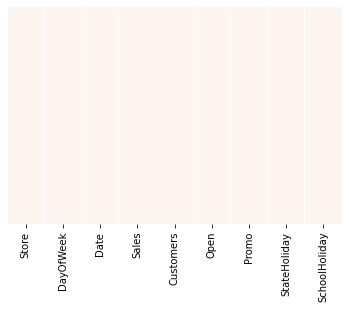

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar=False, cmap='Reds')

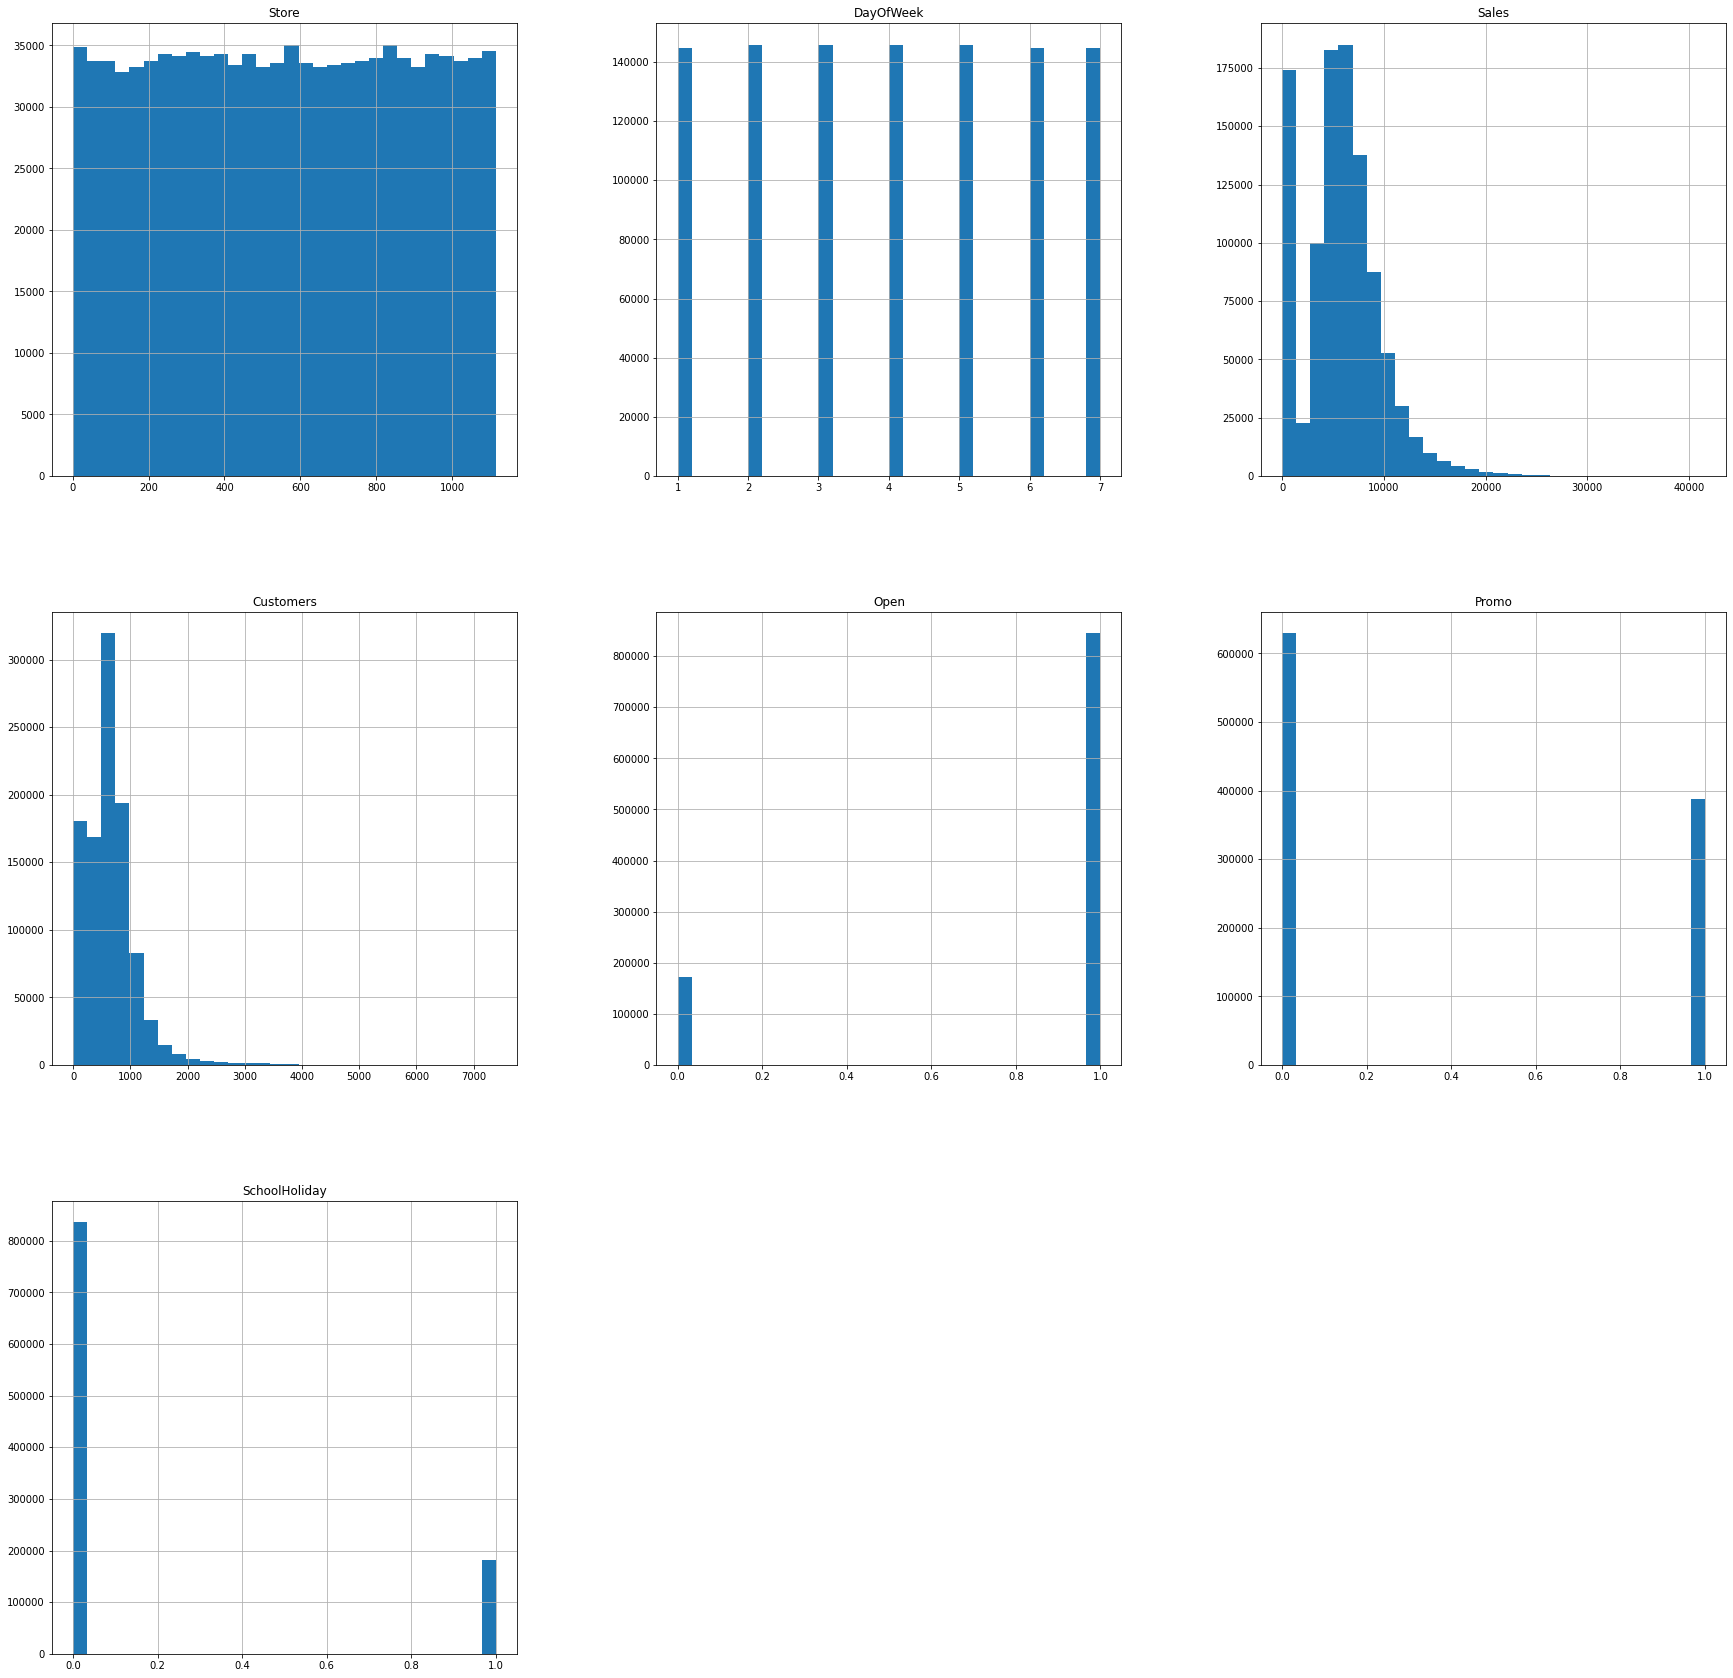

In [ ]:
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation) 
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time 
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time
sales_train_df.hist(bins=30, figsize=(30, 30))
plt.show()

In [ ]:
sales_train_df['Customers'].max()

7388

In [ ]:
# how many stores are open and closed 
print('open stores',len(sales_train_df[sales_train_df['Open'] == 1]))
print('closed stores',len(sales_train_df[sales_train_df['Open']== 0]))

open stores 844392
closed stores 172817


In [ ]:
# only keep open stores and remove closed stores
open_train_df = sales_train_df[sales_train_df['Open']==1]

In [ ]:
open_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,844392.00000,844392.00000,844392.00000,844392.00000,844392.00000,844392.00000,844392.00000
mean,558.42292,3.52036,6955.51429,762.72840,1.00000,0.44635,0.19358
std,321.73191,1.72369,3104.21468,401.22767,0.00000,0.49711,0.39510
min,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000
25%,280.00000,2.00000,4859.00000,519.00000,1.00000,0.00000,0.00000
50%,558.00000,3.00000,6369.00000,676.00000,1.00000,0.00000,0.00000
75%,837.00000,5.00000,8360.00000,893.00000,1.00000,1.00000,0.00000
max,1115.00000,7.00000,41551.00000,7388.00000,1.00000,1.00000,1.00000


In [ ]:
# drop the open column since it has no meaning now
open_train_df.drop(['Open'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
open_train_df.columns,
open_train_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1


In [ ]:
# Average sales = 6955 Euros,	average number of customers = 762	(went up)
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00000,1017209.00000,1017209.00000,1017209.00000,1017209.00000,1017209.00000,1017209.00000
mean,558.42973,3.99834,5773.81897,633.14595,0.83011,0.38151,0.17865
std,321.90865,1.99739,3849.92618,464.41173,0.37554,0.48576,0.38306
min,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,280.00000,2.00000,3727.00000,405.00000,1.00000,0.00000,0.00000
50%,558.00000,4.00000,5744.00000,609.00000,1.00000,0.00000,0.00000
75%,838.00000,6.00000,7856.00000,837.00000,1.00000,1.00000,0.00000
max,1115.00000,7.00000,41551.00000,7388.00000,1.00000,1.00000,1.00000


EXPLORE STORES INFORMATION DATA

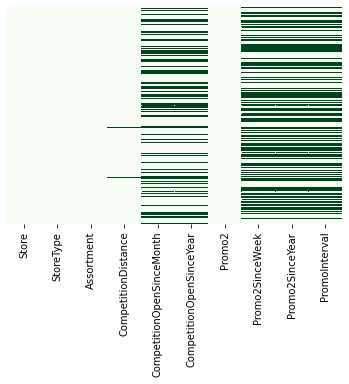

In [ ]:
# Do we have any missing data in the store information dataframe
sns.heatmap(store_info_df.isnull(),  cbar=False, cmap='Greens', yticklabels=False)

In [ ]:
#  looking at the missing values in the 'CompetitionDistance'
 
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,nan,nan,nan,0,nan,nan,NaN
621,622,a,c,nan,nan,nan,0,nan,nan,NaN
878,879,d,a,nan,nan,nan,1,5.00000,2013.00000,"Feb,May,Aug,Nov"


In [ ]:
# looking at the missing values in the 'CompetitionOpenSinceMonth'
# many rows are missing = 354 (almost one third of the 1115 stores)
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.00000,nan,nan,1,13.00000,2010.00000,"Jan,Apr,Jul,Oct"
12,13,d,a,310.00000,nan,nan,1,45.00000,2009.00000,"Feb,May,Aug,Nov"
15,16,a,c,3270.00000,nan,nan,0,nan,nan,NaN
18,19,a,c,3240.00000,nan,nan,1,22.00000,2011.00000,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.00000,nan,nan,1,22.00000,2012.00000,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.00000,nan,nan,1,10.00000,2014.00000,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.00000,nan,nan,1,14.00000,2011.00000,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.00000,nan,nan,0,nan,nan,NaN
1113,1114,a,c,870.00000,nan,nan,0,nan,nan,NaN


In [ ]:
store_info_df[store_info_df['Promo2']==0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00000,9.00000,2008.00000,0,nan,nan,NaN
3,4,c,c,620.00000,9.00000,2009.00000,0,nan,nan,NaN
4,5,a,a,29910.00000,4.00000,2015.00000,0,nan,nan,NaN
5,6,a,a,310.00000,12.00000,2013.00000,0,nan,nan,NaN
6,7,a,c,24000.00000,4.00000,2013.00000,0,nan,nan,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.00000,4.00000,2004.00000,0,nan,nan,NaN
1109,1110,c,c,900.00000,9.00000,2010.00000,0,nan,nan,NaN
1111,1112,c,c,1880.00000,4.00000,2006.00000,0,nan,nan,NaN
1112,1113,a,c,9260.00000,nan,nan,0,nan,nan,NaN


In [ ]:
store_info_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
# Let's set these values to zeros 
cols = ['Promo2SinceWeek', 'Promo2SinceYear','PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth' ]


In [ ]:
for i in cols:
  store_info_df[i].fillna(0, inplace=True)

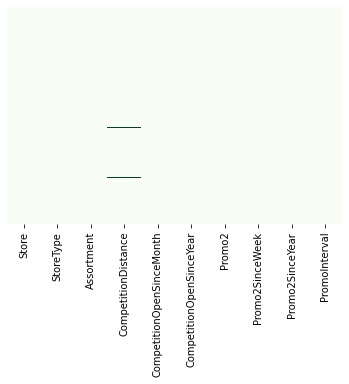

In [ ]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column
sns.heatmap(store_info_df.isnull(),  cbar=False, cmap='Greens', yticklabels=False)

In [ ]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

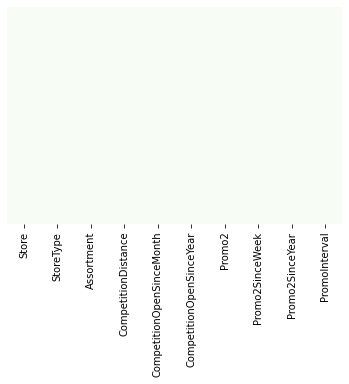

In [ ]:
sns.heatmap(store_info_df.isnull(),  cbar=False, cmap='Greens', yticklabels=False)

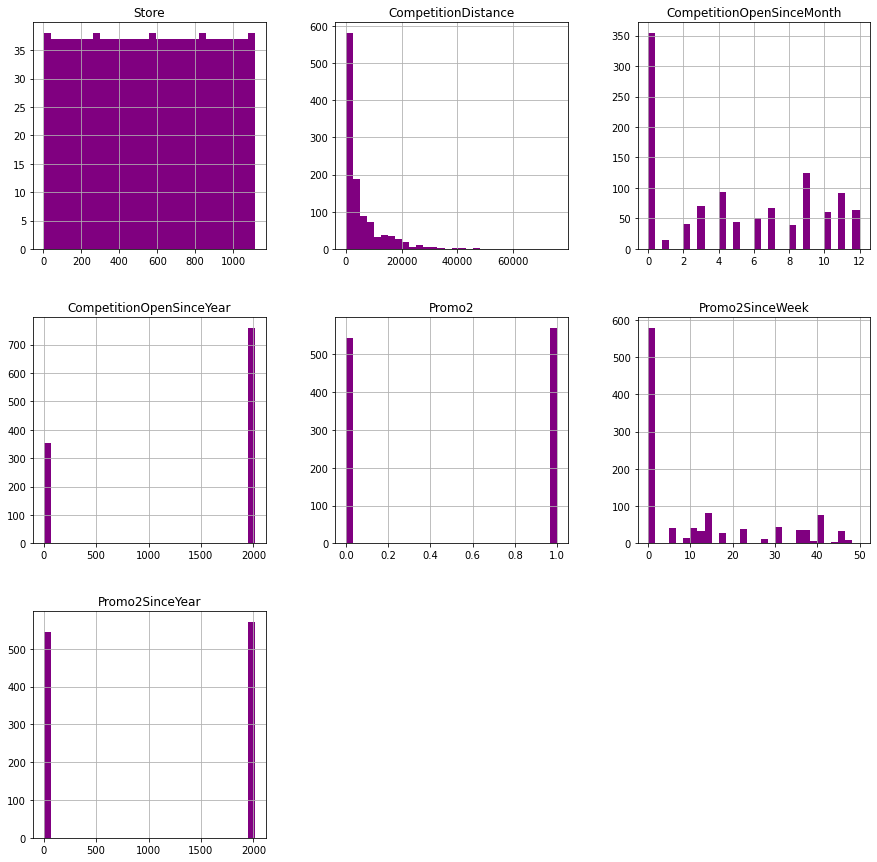

In [ ]:
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)
store_info_df.hist(bins=30, figsize=(15,15), color='purple')
plt.show()

EXPLORE MERGED DATASET 

In [ ]:
# merge both data frames together based on 'store'
all_df = pd.merge(sales_train_df, store_info_df, how= 'inner', on='Store')

In [ ]:
all_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00000,9.00000,2008.00000,0,0.00000,0.00000,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00000,9.00000,2008.00000,0,0.00000,0.00000,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.00000,9.00000,2008.00000,0,0.00000,0.00000,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.00000,9.00000,2008.00000,0,0.00000,0.00000,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.00000,9.00000,2008.00000,0,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.00000,0.00000,0.00000,1,22.00000,2012.00000,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.00000,0.00000,0.00000,1,22.00000,2012.00000,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.00000,0.00000,0.00000,1,22.00000,2012.00000,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.00000,0.00000,0.00000,1,22.00000,2012.00000,"Mar,Jun,Sept,Dec"


In [ ]:
correlations = all_df.corr()['Sales'].sort_values()
correlations
# customers and promo are positively correlated with the sales 
# Promo2 does not seem to be effective at all 

DayOfWeek                   -0.46213
Promo2SinceYear             -0.09106
Promo2                      -0.09104
Promo2SinceWeek             -0.04414
CompetitionDistance         -0.01921
CompetitionOpenSinceMonth   -0.01243
CompetitionOpenSinceYear     0.00275
Store                        0.00513
SchoolHoliday                0.08512
Promo                        0.45234
Open                         0.67847
Customers                    0.89471
Sales                        1.00000
Name: Sales, dtype: float64

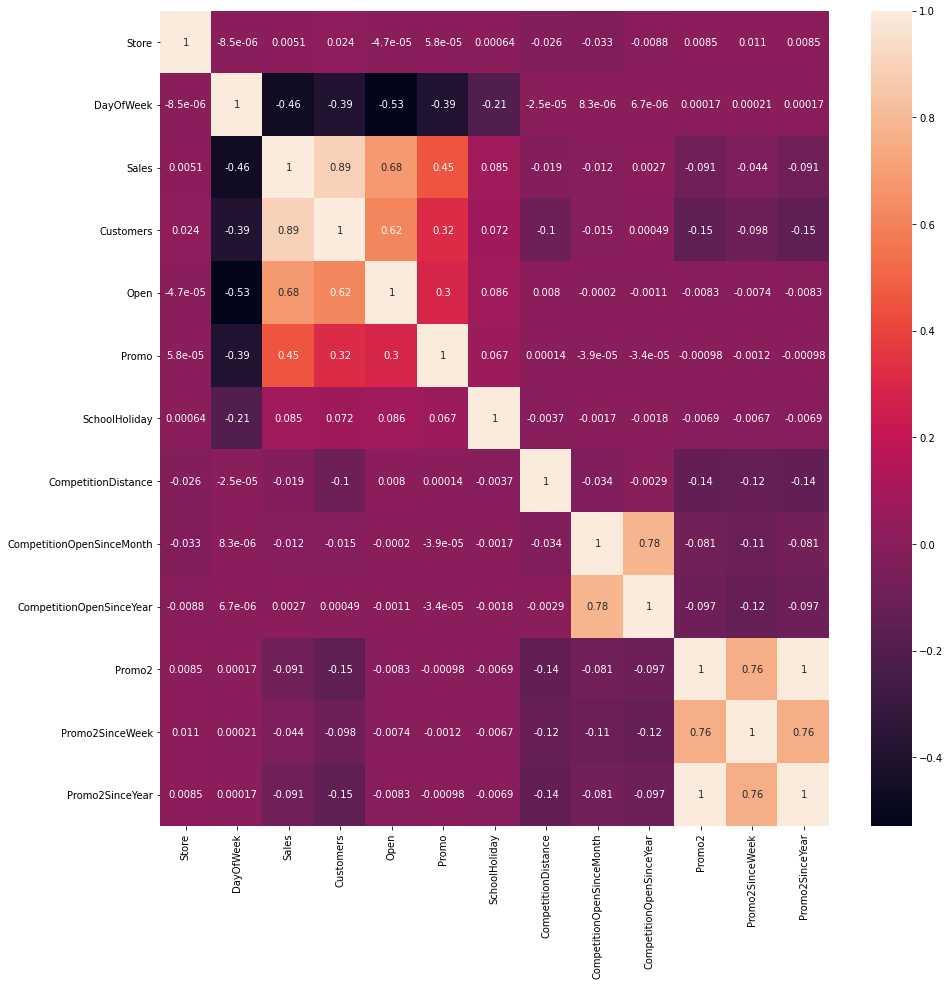

In [ ]:
correlated = all_df.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlated, annot=True)
# Customers & Promo2 and sales are strongly correlated 

Feature engineering Adding time data

In [ ]:
all_df.columns.sort_values()

Index(['Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Customers', 'Date', 'DayOfWeek', 'Open',
       'Promo', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear',
       'PromoInterval', 'Sales', 'SchoolHoliday', 'StateHoliday', 'Store',
       'StoreType'],
      dtype='object')

In [ ]:
# Let's separate the year and put it into a separate column 
all_df['Year'] = pd.DatetimeIndex(sales_train_df['Date']).year

In [ ]:
all_df['Year'].unique()

array([2015, 2014, 2013])

In [ ]:
# Let's do the same for the Day and Month
all_df['Month'] = pd.DatetimeIndex(all_df['Date']).month
all_df['Day'] = pd.DatetimeIndex(all_df['Date']).day

In [ ]:
all_df['Month'].unique(),


(array([ 7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8]),)

In [ ]:
all_df['Day'].unique()

array([31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,
       14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

Text(0.5, 1.0, 'Average Costumers Per Month')

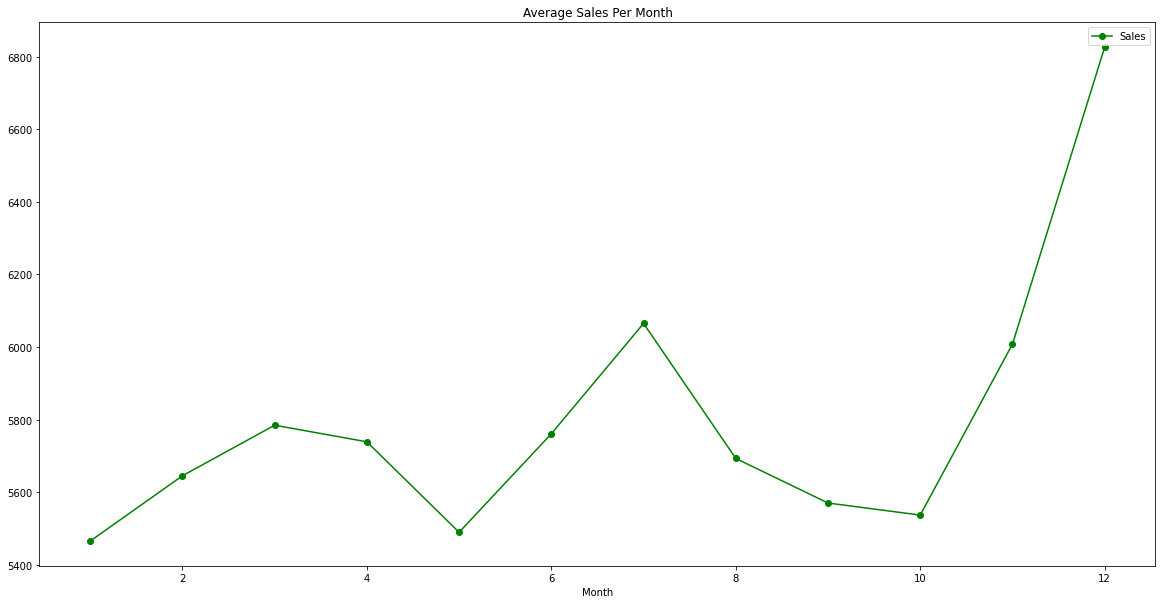

<Figure size 432x288 with 0 Axes>

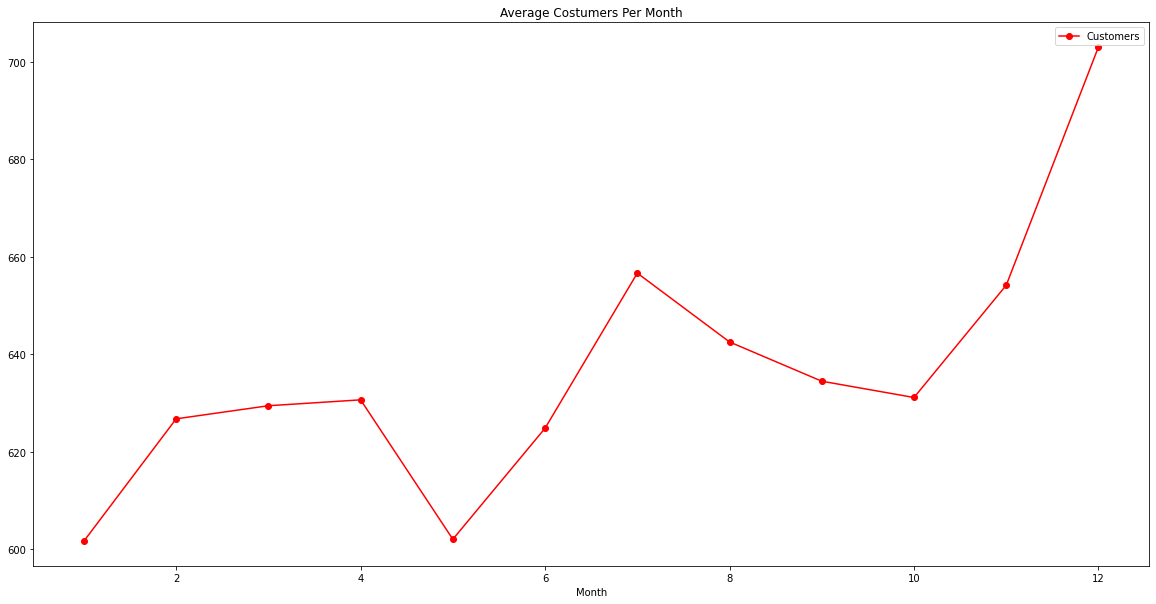

In [ ]:
# Let's take a look at the average sales and number of customers per month 
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
# It looks like sales and number of customers peak around christmas timeframe
axis = all_df.groupby('Month')[['Sales']].mean().plot(figsize=(20,10),marker='o', color='g')
axis.set_title('Average Sales Per Month')

plt.figure()

axis = all_df.groupby('Month')[['Customers']].mean().plot(figsize=(20,10),marker='o', color='red')
axis.set_title('Average Costumers Per Month')

Text(0.5, 1.0, 'Average Customers Per Day')

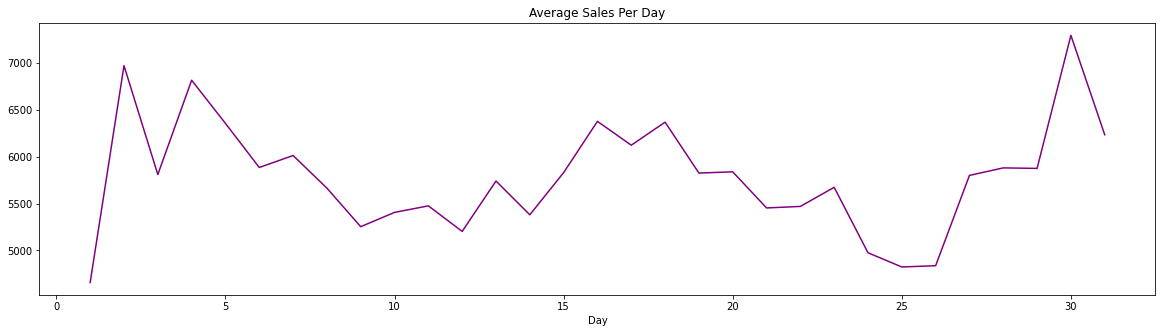

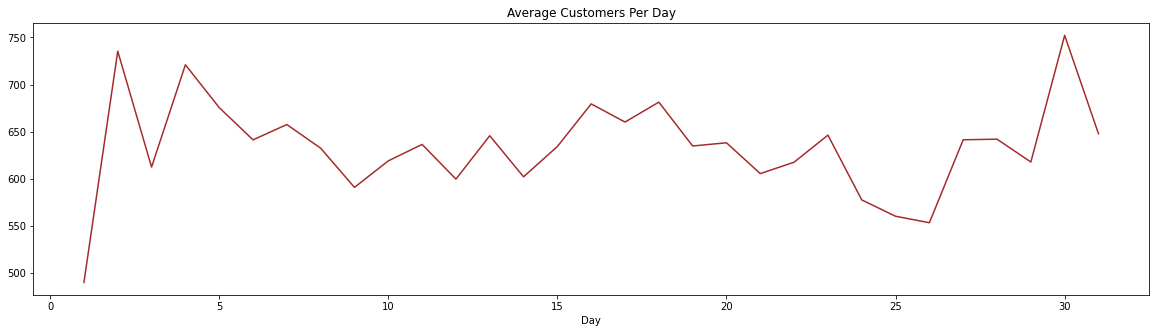

In [ ]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month 
# Most customers and sales are around 30th and 1st of the month

axis = all_df.groupby('Day')['Sales'].mean().plot(figsize=(20, 5), color='Purple')
axis.set_title('Average Sales Per Day')

plt.figure()

axis = all_df.groupby('Day')['Customers'].mean().plot(figsize=(20, 5), color='Brown')
axis.set_title('Average Customers Per Day')

Text(0.5, 1.0, 'Average Customers Per Day')

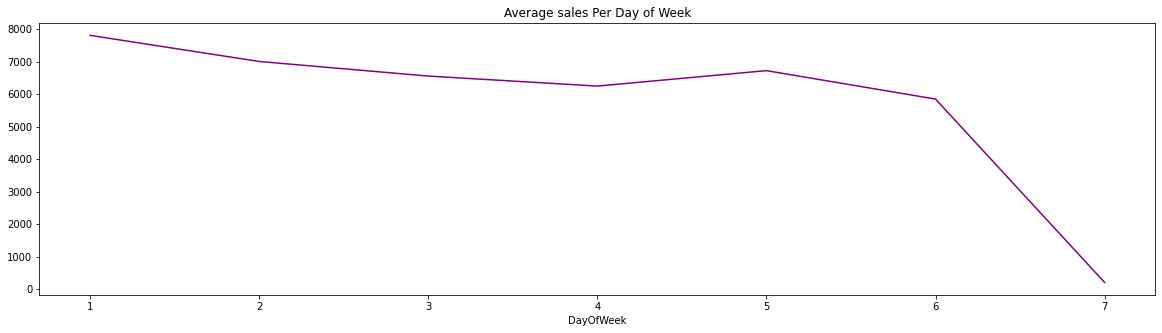

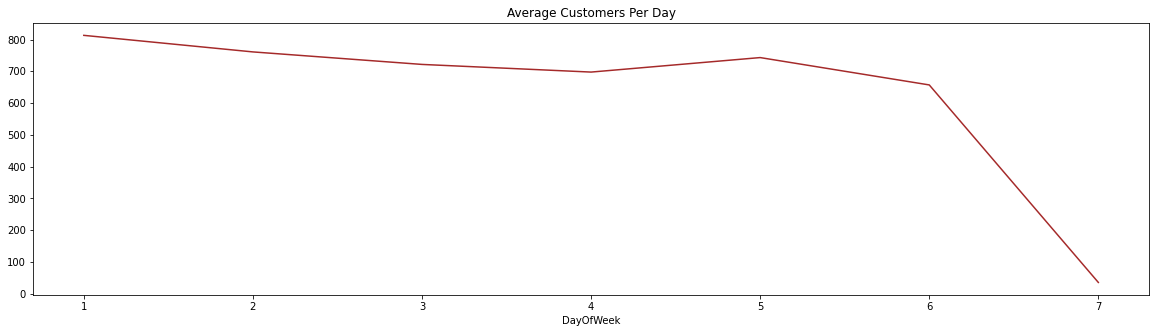

In [ ]:
# Let's do the same for the day of the week  (note that 7 = Sunday)

axis = all_df.groupby('DayOfWeek')['Sales'].mean().plot(figsize=(20,5),color='Purple')
axis.set_title('Average sales Per Day of Week')

plt.figure()

axis = all_df.groupby('DayOfWeek')['Customers'].mean().plot(figsize=(20, 5), color='Brown')
axis.set_title('Average Customers Per Day')

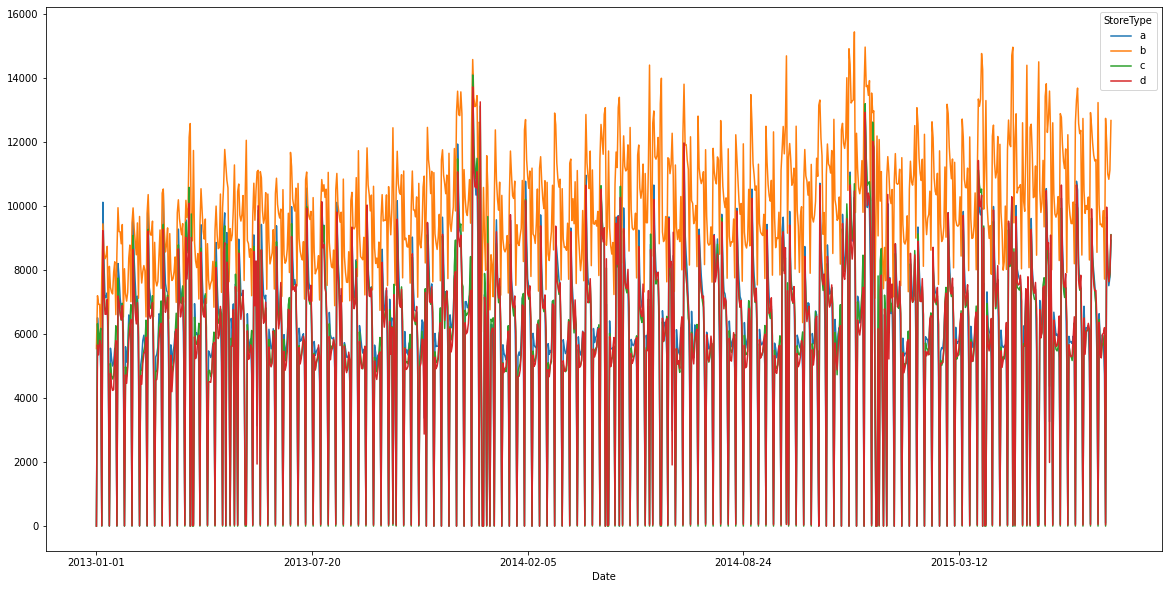

In [ ]:
all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(figsize=(20,10))

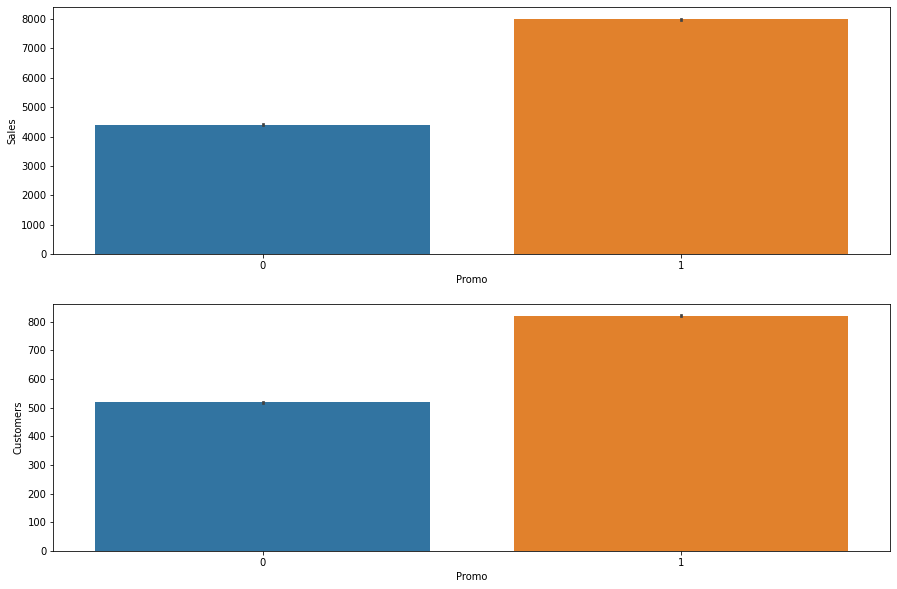

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.barplot(x='Promo', y='Sales', data=all_df)
plt.subplot(212)
sns.barplot(x='Promo', y='Customers', data=all_df)


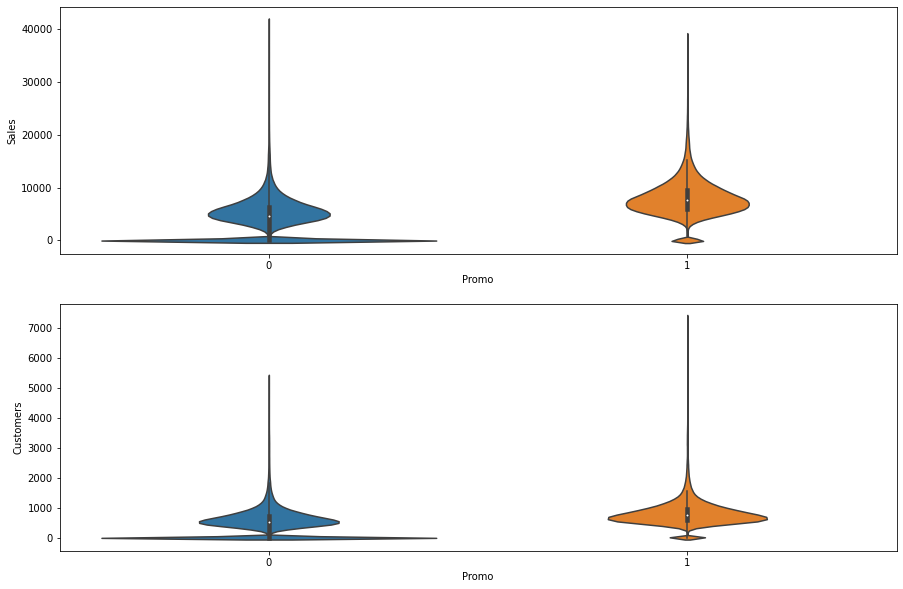

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.violinplot(x='Promo', y='Sales', data=all_df)
plt.subplot(212)
sns.violinplot(x='Promo', y='Customers', data=all_df)


# TRAIN THE MODEL PART

In [ ]:
# import prophet 
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
backup_df = all_df.copy()

In [ ]:
all_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:
def sales_predictions(Store_ID, pred_df, periods):
  pred_df = pred_df[pred_df['Store']== Store_ID]
  pred_df = pred_df[['Date', 'Sales']].rename(columns = {'Date':'ds', 'Sales': 'y'})
  pred_df = pred_df.sort_values('ds')

  model= Prophet()
  model.fit(df=pred_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure = model.plot(forecast, xlabel='Date', ylabel='Sales')
  figure2 = model.plot_components(forecast)


# MAKE A PREDICTION ON MODEL

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


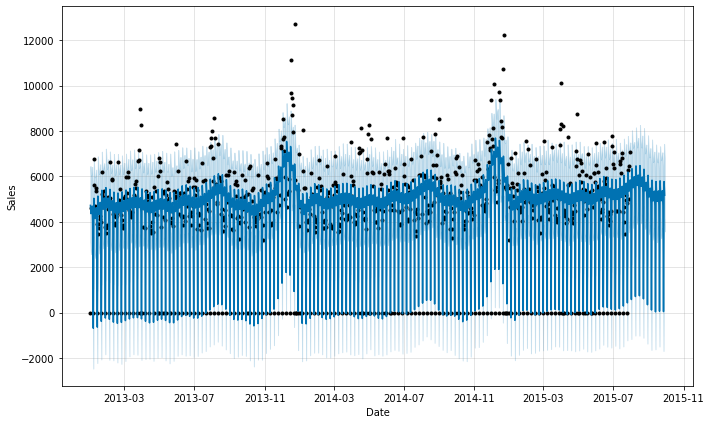

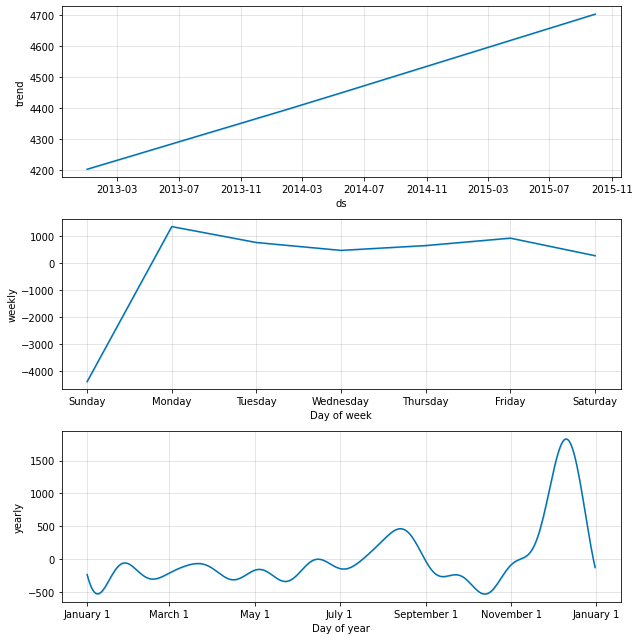

In [ ]:
sales_predictions(249, all_df, 60)